In [19]:
import heartpy as hp
import matplotlib.pyplot as plt
import wfdb
from scipy.signal import resample
from  src.signals.processing import obtain_bpm

sample_rate = 257
derivation=10
startAt=0
finishAt=5000
signals, fields = wfdb.rdsamp('resources/I01')
print(obtain_bpm(signals[:,derivation],sample_rate,startAt,finishAt))

96.65547347212893


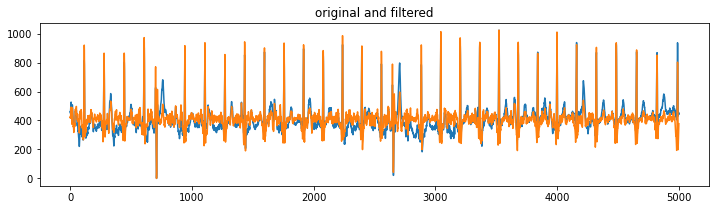

In [20]:
filtered = hp.filter_signal(signals[startAt:finishAt,derivation], cutoff = 5, sample_rate = sample_rate, filtertype='highpass')

plt.figure(figsize=(12,3))
plt.title('original and filtered')
plt.plot(hp.scale_data(signals[startAt:finishAt,derivation]))
plt.plot(hp.scale_data(filtered))
plt.show()


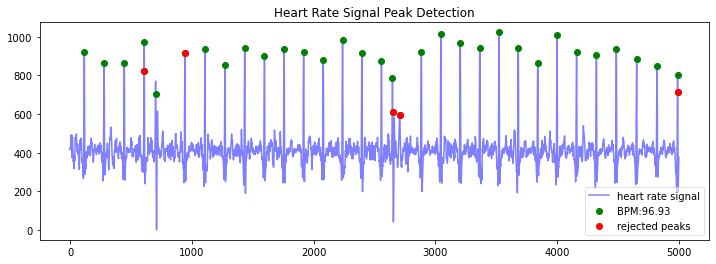

bpm: 96.934236


In [21]:
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    if(measure=='bpm'):
        print('%s: %f' %(measure, m[measure]))

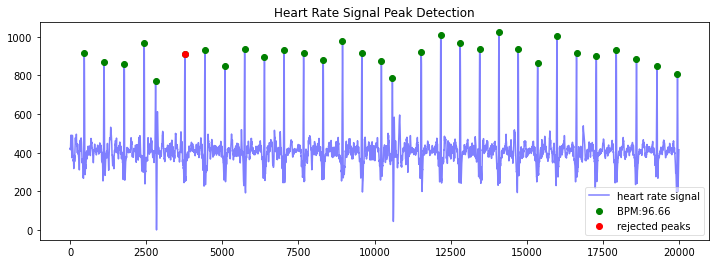

bpm: 96.655473


In [22]:
resampled_signal = resample(filtered, len(filtered) * 4)
d, m = hp.process(hp.scale_data(resampled_signal), sample_rate * 4)

plt.figure(figsize=(12,4))
hp.plotter(d, m)

for measure in m.keys():
    if(measure=='bpm'):
        print('%s: %f' %(measure, m[measure]))


